In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
birddata = pd.read_csv('./birds_info/bird_tracking.csv')

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

# Exercise 1

**Instructions**

- pandas makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. The sample code shows you how to group the dataframe by birdname and then find the average ```speed_2d``` for each bird. Modify the code to assign the mean altitudes of each bird into an object called ```mean_altitudes```.


In [3]:
# First, use `groupby` to group up the data.
grouped_birds = birddata.groupby("bird_name")

# Now operations are performed on each group.
mean_speeds = grouped_birds.speed_2d.mean()

# The `head` method prints the first 5 lines of each bird.
grouped_birds.head()

# Find the mean `altitude` for each bird.
# Assign this to `mean_altitudes`.
mean_altitudes = grouped_birds.altitude.mean()

In [4]:
mean_altitudes

bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64

# Exercise 2

**Instructions**

- In this exercise, we will group the flight times by date and calculate the mean altitude within that day. Use ```groupby``` to group the data by date.
- Calculate the mean altitude per day and store these results as ```mean_altitudes_perday```.


In [5]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata.date_time.dt.date

# Check the head of the column.
birddata.date.head()

grouped_bydates = birddata.groupby("date")
mean_altitudes_perday = grouped_bydates.altitude.mean()

In [6]:
mean_altitudes_perday

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
2013-08-20    184.461224
2013-08-21    171.546185
2013-08-22    114.172691
2013-08-23    144.716049
2013-08-24    101.446721
2013-08-25     93.162602
2013-08-26     75.995951
2013-08-27     84.591093
2013-08-28    111.210526
2013-08-29    177.421488
2013-08-30     92.520161
2013-08-31    160.975904
2013-09-01     84.753086
2013-09-02     88.128514
2013-09-03     93.975709
2013-09-04     90.717213
2013-09-05     87.264000
2013-09-06     89.020492
2013-09-07    103.412955
2013-09-08     76.566265
2013-09-09     81.483471
2013-09-10     90.618852
2013-09-11     77.222672
2013-09-12     75.646091
2013-09-13     66.615079
                 ...    
2014-04-01    115.797571
2014-04-02     13.589431
2014-04-03     26.772727
2014-04-04    101.441667
2014-04-05     96.995536
2014-04-06     13.426540
2014-04-07     27.105000
2014-04-08      9.597087
2014-04-09     22.84

# Exercise 3

**Instructions**

- ```birddata``` already contains the date column. To find the average speed for each bird and day, create a new grouped dataframe called ```grouped_birdday``` that groups the data by both ```bird_name``` and ```date```.


In [7]:
grouped_birdday = birddata.groupby(["bird_name", 'date'])


mean_altitudes_perday = grouped_birdday.altitude.mean()

# look at the head of `mean_altitudes_perday`.
mean_altitudes_perday.head()

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

# Exercise 4

**Instructions**

- Great! Now find the average speed for each bird and day. Store these are three pandas Series objects – one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.


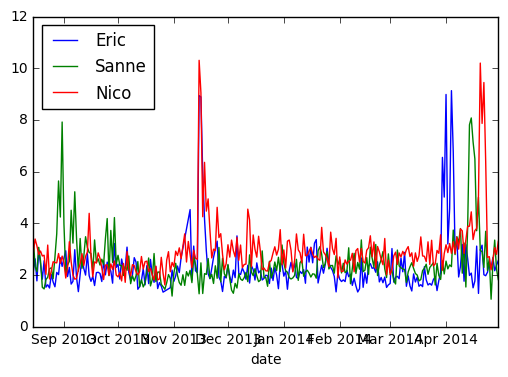

In [14]:
eric_daily_speed  = grouped_birdday.speed_2d.mean()['Eric']
sanne_daily_speed = grouped_birdday.speed_2d.mean()['Sanne']
nico_daily_speed  = grouped_birdday.speed_2d.mean()['Nico']

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()